# Data quality report

In [77]:
# import libs
import ipywidgets as widgets
%matplotlib inline
%run ../src/visualization/check_processed_data.py

In [78]:
metafile = "../metadata/bomm1_its.yml"
#                  year  mo  dy  hr  mn  ss 
date = dt.datetime(2018,  1, 10,  0,  0,  0)
self = Dashboard(metafile, number_of_minutes=10)
self.iowaga_region = "GLOBAL"
self.run(date);
self.get_data()

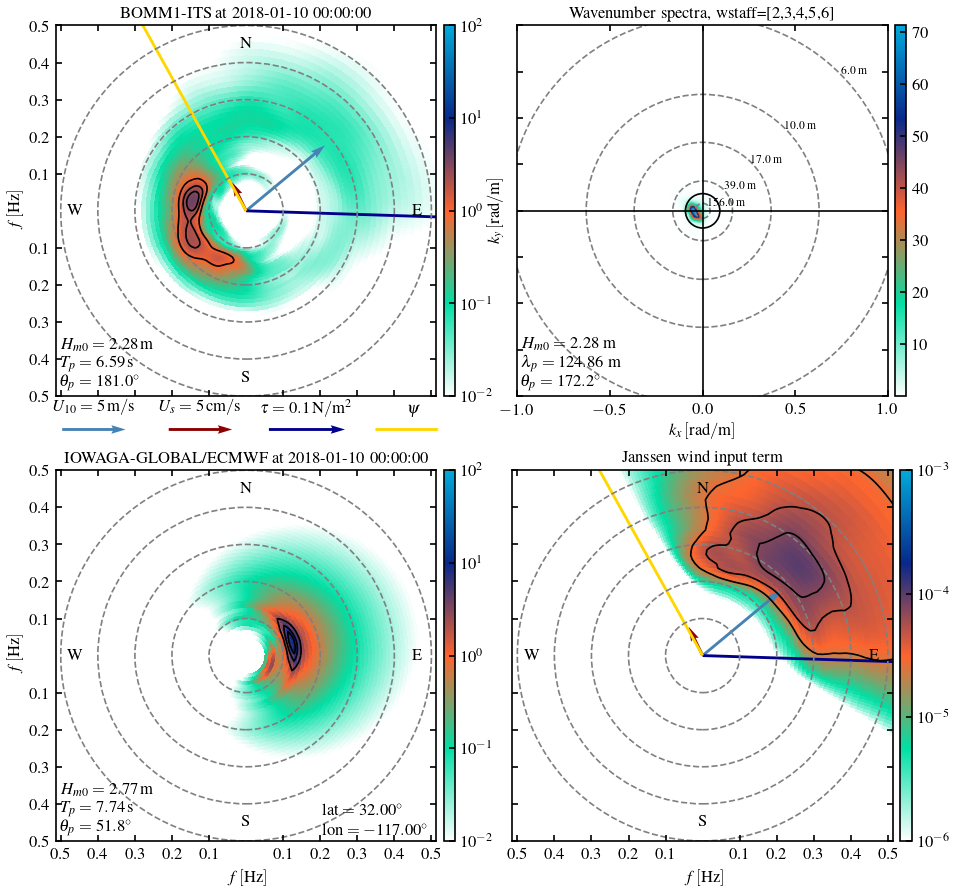

In [79]:
self.plot_spectra(kxky=True)

In [ ]:
self.plot_surface_elevation(zomm_x=None, zomm_y=[-2,2])

In [ ]:
self.plot_wind_velocity(zomm_x=None, zomm_y=None)

In [ ]:
self.plot_buoy_accelerometer(zomm_x=None, zomm_y=[-4,4])

In [ ]:
self.plot_buoy_gyroscope(zomm_x=None, zomm_y=None)